In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_selection import RFECV
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

In [129]:
raw = pd.read_csv('csvs/training_dataset.csv')
test = pd.read_csv('csvs/test_dataset.csv')

In [130]:
'''
authors = raw.author.unique()
diccio = {}
for i, a in enumerate(authors):
    diccio[a]=(i+1)
raw.author=raw.author.map(diccio)
'''

'\nauthors = raw.author.unique()\ndiccio = {}\nfor i, a in enumerate(authors):\n    diccio[a]=(i+1)\nraw.author=raw.author.map(diccio)\n'

In [131]:
raw.to_csv('csvs/dataClean.csv', index=False)

In [132]:
d = pd.read_csv('csvs/dataClean.csv')
d.head()

,id,0,1,2,3,4,5,6,7,8,9,author
0,0,0.142636,0.431070,0.032912,-0.486796,0.261718,-1.013906,-0.081827,0.330352,0.438262,-0.761088,Ubuntius
1,1,0.019197,0.525284,0.068476,0.166658,0.261718,0.231839,0.635431,0.133209,0.313536,-0.002374,Philippus
2,2,0.093260,-0.087108,-2.268081,-0.164963,0.261718,1.477585,0.635431,-0.370641,0.126447,1.078357,Marcus
3,3,-0.017834,-0.228430,0.370770,1.293671,0.172340,-0.058835,0.446679,1.609556,2.277968,-0.172339,Clarius
4,4,0.080916,-0.142067,0.171611,-0.470713,0.261718,-0.141884,-0.044076,0.375551,0.032902,0.009898,Philippus


In [133]:
cols = list(d.columns[1:-1])
cols

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [134]:
# Preparo los dato con los que entrenar
X = d[cols]
y = d['author']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.11, random_state=17)

In [143]:
# Entreno el modelo
diccio={}
lista = range(10,60,10)
for i, e in enumerate(lista):
    # Random Forest Classifier:
    clf = RandomForestClassifier(n_estimators=199)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=e)
    
    # Entreno el modelo:
    model = clf.fit(X_train, y_train)
    
    # Resultados del dataset TRAIN:
    y_test_pred = clf.predict(X_test)
    accu = accuracy_score(y_test, y_test_pred)
    
    diccio[f'{e} estimators']={'accu':accu}
    print (f'Processed {i+1} / {len(lista)}')

Processed 1 / 5
Processed 2 / 5
Processed 3 / 5
Processed 4 / 5
Processed 5 / 5


{'196 estimators': {'accu': 0.9901664145234493}, '197 estimators': {'accu': 0.989409984871407}, '198 estimators': {'accu': 0.989409984871407}, '199 estimators': {'accu': 0.989409984871407}, '200 estimators': {'accu': 0.9901664145234493}, '201 estimators': {'accu': 0.9848714069591528}}
                    accu
196 estimators  0.990166
200 estimators  0.990166


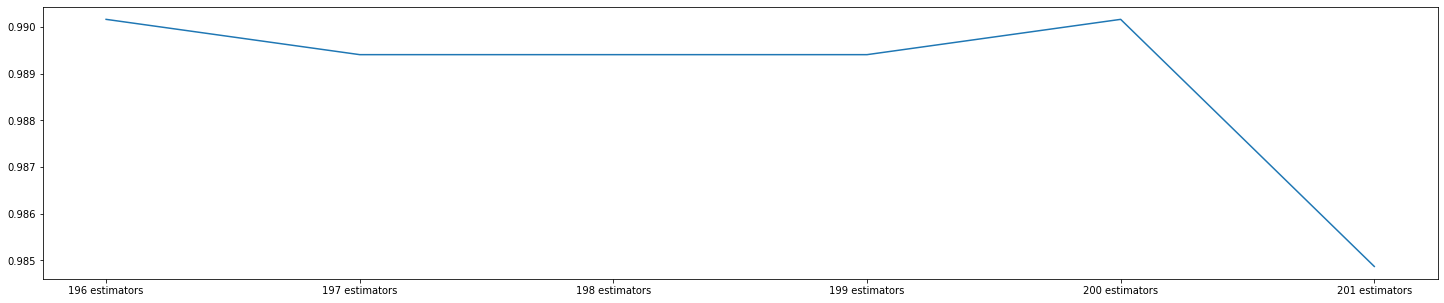

In [137]:
# La predicción de X_train:
print(diccio)

# Elijo el que tenga el accuracy mayor:
tabla = pd.DataFrame(diccio)
tab = tabla.T
print(tab[tab.accu==max(tab.accu)])

# Reviso la gráfica por si hubiese algún rango mínimo:
tab.accu.plot(figsize=(25,5));

### Me quedo con el mejor modelo (mayor accuracy)

In [138]:
# Random Forest Classifier:
clf = RandomForestClassifier(n_estimators=199)

# Entreno el modelo con el 100% del dataset Train:
model = clf.fit(X, y)

### Predict de data_test

In [139]:
dTest = pd.read_csv('csvs/test_dataset.csv')
dTest.head()

,id,0,1,2,3,4,5,6,7,8,9
0,0,0.019197,0.038511,0.192950,0.323367,0.261718,-0.100360,0.106925,0.463833,0.064084,-0.025146
1,1,0.006853,0.462474,-0.016878,0.649795,-1.347089,-0.307984,-0.119577,0.855597,0.375899,-0.092040
2,2,0.229043,-0.369751,0.484575,0.250174,0.261718,-0.017310,0.446679,0.232984,-0.123005,-0.126856
3,3,-0.104241,-0.055704,0.299642,0.391249,0.172340,0.314889,0.106925,0.220694,0.219991,0.368972
4,4,1.043737,-0.401156,0.473906,0.506215,0.261718,0.065740,-0.195078,0.515440,-0.808997,0.315303


In [140]:
X_test = dTest[cols]

# Predicción de author con los datos de test_datatest.csv:
y_test_pred = model.predict(X_test)
y_test_pred

# Lo incluyo en el dataframe:
dTest['author'] = y_test_pred

# Preparo df con las 2 columnas que quiero subir (id, price):
sub = dTest[['id', 'author']]

In [141]:
sub

,id,author
0,0,Philippus
1,1,Philippus
2,2,Marcus
3,3,Marcus
4,4,Marcus
...,...,...
8007,8007,Philippus
8008,8008,Blanquius
8009,8009,Blanquius
8010,8010,Marcus


In [142]:
# Exporto archivo .csv:
sub.to_csv("csvs/sub01.csv", index=False)